In [1]:
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [2]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
from FlyMH import FlyMH

In [3]:
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = np.log_normal(0,1)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")

Mean of x = 0.005253028489682668
Std of x = 0.9983292735417362


Execution time: 7.997608 seconds
[[0.00525303 0.99832927]
 [0.00525303 0.99832927]
 [0.00539033 0.99763202]
 ...
 [0.00298241 1.0002222 ]
 [0.00386007 0.99903342]
 [0.00481784 0.99847682]]


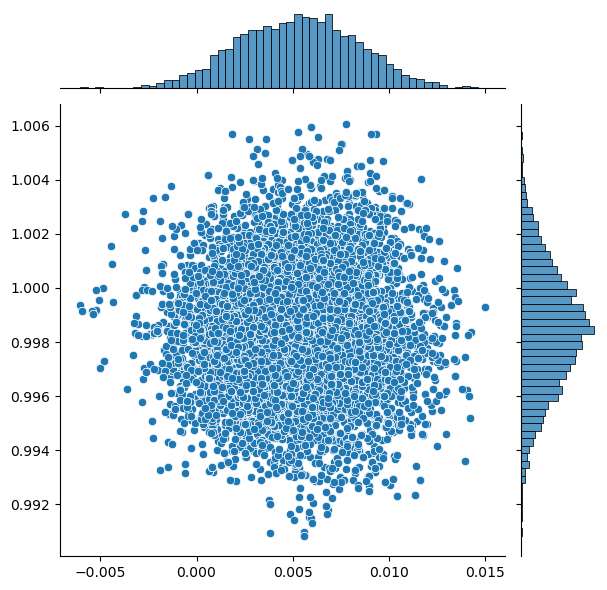

In [4]:
map = np.array([realMean,realStd])
test_vanillMH = MetropolisHastings(x)

start_time = time.time()
test_vanillMH_run = test_vanillMH.run(10000, map, x)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
print(test_vanillMH_run)
sns.jointplot(x=test_vanillMH_run[:,0],y=test_vanillMH_run[:,1])

In [31]:
cons = ConsensusMH(dataset = x, num_batches=4)

start_time = time.time()
S = cons.run(10000, map)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
sns.jointplot(x=S[:,0],y=S[:,1])

TypeError: 'int' object is not callable